In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [106]:
df = pd.read_csv('placement.csv')

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cgpa     200 non-null    float64
 1   package  200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [108]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


<Axes: xlabel='cgpa', ylabel='package'>

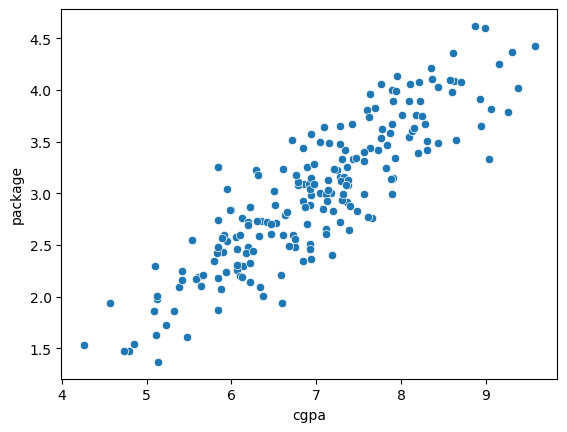

In [109]:
sns.scatterplot(data=df,x='cgpa',y='package')

In [110]:
x= df.iloc[:,:-1]
y=df.iloc[:,-1]
y

0      3.26
1      1.98
2      3.25
3      3.67
4      3.57
       ... 
195    2.46
196    2.57
197    3.24
198    3.96
199    2.33
Name: package, Length: 200, dtype: float64

In [111]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=11)

In [112]:
x_train.shape

(180, 1)

In [113]:
from sklearn.linear_model import LinearRegression

In [114]:
lr=LinearRegression()

In [115]:
lr.fit(x_train,y_train)

LinearRegression()

In [116]:
y_test

174    2.99
33     2.73
173    2.56
186    3.47
22     2.30
53     2.61
134    2.83
56     2.74
143    1.54
94     2.42
55     3.39
73     4.03
130    2.49
41     2.70
14     3.42
63     4.25
16     2.35
60     2.19
111    2.25
0      3.26
Name: package, dtype: float64

In [117]:
x_test

,cgpa
174,7.32
33,6.35
173,6.75
186,7.84
22,6.14
53,6.47
134,7.20
56,5.84
143,4.85
94,5.83


In [118]:
lr.predict(x_test.loc[22].values.reshape(1,1))

C:\Users\ABC\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2.52004049])

In [119]:
m=lr.coef_
m

array([0.56940053])

In [120]:
c=lr.intercept_
c

-0.9760787451350059

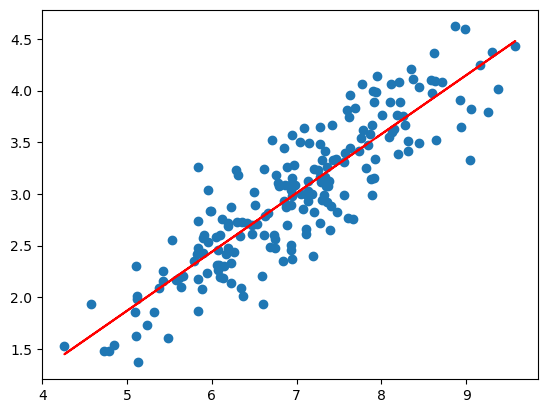

In [121]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(x_train,lr.predict(x_train),'r')

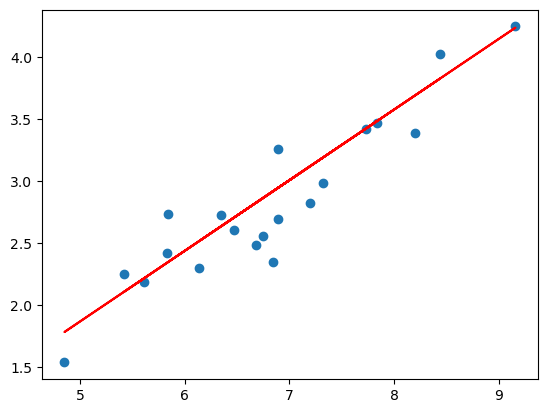

In [122]:
plt.scatter(x_test,y_test)
plt.plot(x_test,lr.predict(x_test),'r')

In [123]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

In [124]:
y_pred = lr.predict(x_test)

In [125]:
print('MAE = ',mean_absolute_error(y_pred,y_test))
print('MSE = ',mean_squared_error(y_pred,y_test))
print('r2_score = ',r2_score(y_pred,y_test))

MAE =  0.20477474477501273
MSE =  0.06277375154528912
r2_score =  0.8267660001527322


In [136]:
n=len(y_train)
k=1
r2=r2_score(y_pred,y_test)

In [137]:
R_adjust=1-((1-r2)*(n-1))/(n-1-1)
R_adjust

0.8257927754344891

In [74]:
class MyLr:
    def __init__(self):
        self.m=None
        self.c=None
    def fit(self,x_train,y_train):
        num=0
        den=0
        for i in range(len(x_train)):
            num=num+((x_train.iloc[i].values-x_train.mean())*(y_train.iloc[i]-y_train.mean()))
            den=den+((x_train.iloc[i].values)-x_train.mean())**2
        self.m=num/den
        self.c=y_train.mean()-self.m*x_train.mean()
        print(self.m)
        print(self.c)
    def predict(self,x_test):
        return self.m*x_test+self.c

In [75]:
mylr=MyLr()

In [76]:
mylr.fit(x_train,y_train)

cgpa    0.569401
dtype: float64
cgpa   -0.976079
dtype: float64


In [77]:
x_test.loc[22].values

array([6.14])

In [78]:
mylr.predict(x_test.loc[22].values)

cgpa    2.52004
dtype: float64